In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression

In [2]:
data_x,data_y = make_regression(n_features=1,n_samples=350,noise=14.2,bias=2.0)
print data_x.shape
print data_y.shape

(350, 1)
(350,)


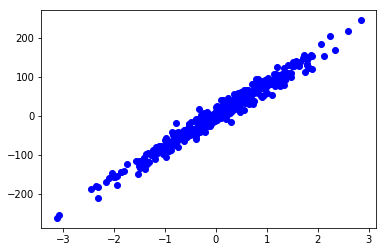

In [3]:
plt.scatter(data_x,data_y,c='b')
plt.show()

In [4]:
split = int(0.80*data_x.shape[0])
x_train = data_x[:split]
y_train = data_y[:split]
x_test = data_x[split:]
y_test = data_y[split:]
print split
print x_train.shape,y_train.shape
print x_test.shape,y_test.shape

280
(280, 1) (280,)
(70, 1) (70,)


In [10]:
def hypothesis(x,w):
    return w[0]*1 + w[1]*x

def cost_function(x,w, y_true):
    err = 0.0
    m = x.shape[0]
    
    for ix in range(m):
        err += (y_true[ix]-hypothesis(x[ix],w))**2
    
    err = err/2*m
    return err

In [11]:
def get_grad(x,w,y_true):
    grad_0 = 0.0
    grad_1 = 0.0
    
    m = x.shape[0]
    
    for ix in range(m):
        grad_0 += (y_true[ix] - hypothesis(x[ix],w))*(-1)
        grad_1 += (y_true[ix] - hypothesis(x[ix],w))*(-1*x[ix])
    
    grad_0 = grad_0/m
    grad_1 = grad_1/m
    
    return [grad_0,grad_1]

In [12]:
def gradient_descent(x,w,y_true, learning_rate = 0.1):
    error = cost_function(x,w,y_true)
    
    [grad_0,grad_1] = get_grad(x,w,y_true)
    
    w[0] = w[0] - learning_rate*grad_0
    w[1] = w[1] - learning_rate*grad_1
    
    return error, w

In [13]:
#initialising weights and loss
W = np.array([0.1,0.1])
loss = []

In [14]:
#to find weights
num_of_epoch = 500
for ix in range(num_of_epoch):
    err,w = gradient_descent(w=W,x=x_train,y_true=y_train,learning_rate=0.2)
    loss.append(err)
print W

[  1.17646291  79.10234512]


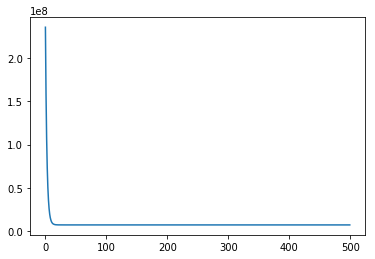

In [15]:
plt.plot(loss)
plt.show()

In [16]:
#now using predefined library
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()
lr.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
lr.score(x_test,y_test)

0.97327028156918383